In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
main_df = pd.read_csv('hotel_bookings.csv')
main_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
main_df.shape

(119390, 32)

In [4]:
main_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df_copy = main_df.copy()

In [6]:
df_copy.shape

(119390, 32)

In [7]:
df_copy.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
# Checking NULL Values
null_val = df_copy.isnull().sum()
null_perc = (df_copy.isnull().sum()/len(df_copy))*100
null_values = pd.DataFrame([null_val, null_perc]).T
null_values.rename({0 : 'Number of NULL Values', 1 : 'Percentage of NULL Values'}, axis = 1, inplace = True)
null_values

,Number of NULL Values,Percentage of NULL Values
hotel,0.0,0.000000
is_canceled,0.0,0.000000
lead_time,0.0,0.000000
arrival_date_year,0.0,0.000000
arrival_date_month,0.0,0.000000
arrival_date_week_number,0.0,0.000000
arrival_date_day_of_month,0.0,0.000000
stays_in_weekend_nights,0.0,0.000000
stays_in_week_nights,0.0,0.000000
adults,0.0,0.000000


In [9]:
df_copy.shape

(119390, 32)

In [10]:
df_copy['children'].value_counts(dropna = False)

0.0     110796
1.0       4861
2.0       3652
3.0         76
NaN          4
10.0         1
Name: children, dtype: int64

In [11]:
df_copy.shape

(119390, 32)

In [12]:
df_copy['children'].fillna(df_copy['children'].mode()[0], inplace = True)
df_copy['children'].value_counts(dropna = False)

0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [13]:
df_copy['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
ATF        1
CYM        1
NCL        1
SMR        1
SDN        1
Name: country, Length: 177, dtype: int64

In [14]:
df_copy['country'].fillna(df_copy['country'].mode()[0], inplace = True)
df_copy['country'].value_counts()

PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
ATF        1
CYM        1
NCL        1
SMR        1
SDN        1
Name: country, Length: 177, dtype: int64

In [15]:
df_copy['agent'].value_counts(dropna = False)

9.0      31961
NaN      16340
240.0    13922
1.0       7191
14.0      3640
         ...  
117.0        1
294.0        1
352.0        1
158.0        1
472.0        1
Name: agent, Length: 334, dtype: int64

In [16]:
df_copy['agent'].fillna(0.0, inplace = True)
df_copy['agent'].value_counts(dropna = False)

9.0      31961
0.0      16340
240.0    13922
1.0       7191
14.0      3640
         ...  
117.0        1
294.0        1
352.0        1
158.0        1
472.0        1
Name: agent, Length: 334, dtype: int64

In [17]:
df_copy['company'].isnull().sum()/len(df_copy) * 100

94.30689337465449

In [18]:
df_copy.shape

(119390, 32)

In [19]:
df_copy.drop('company', axis = 1, inplace = True)
df_copy.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [20]:
df_copy.shape

(119390, 31)

In [21]:
# Rechecking NULL Values
null_val_after = df_copy.isnull().sum()
null_perc_after = (df_copy.isnull().sum()/len(df_copy))*100
null_values_after = pd.DataFrame([null_val_after, null_perc_after]).T
null_values_after.rename({0 : 'Number of NULL Values', 1 : 'Percentage of NULL Values'}, axis = 1, inplace = True)
null_values_after

,Number of NULL Values,Percentage of NULL Values
hotel,0.0,0.0
is_canceled,0.0,0.0
lead_time,0.0,0.0
arrival_date_year,0.0,0.0
arrival_date_month,0.0,0.0
arrival_date_week_number,0.0,0.0
arrival_date_day_of_month,0.0,0.0
stays_in_weekend_nights,0.0,0.0
stays_in_week_nights,0.0,0.0
adults,0.0,0.0


In [22]:
df_copy['children'] = df_copy['children'].astype('int64')
df_copy['agent'] = df_copy['agent'].astype('int64')

In [23]:
df_copy.shape

(119390, 31)

In [24]:
# Rechecking data types
df_copy.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [25]:
ac = df_copy[['adults', 'children']]
ac[(ac['adults'] == 0) & (ac['children'] == 0)]

,adults,children
2224,0,0
2409,0,0
3181,0,0
3684,0,0
3708,0,0
...,...,...
115029,0,0
115091,0,0
116251,0,0
116534,0,0


In [26]:
df_copy.shape

(119390, 31)

In [27]:
df_copy = df_copy[~((df_copy['adults'] == 0) & (df_copy['children'] == 0))]

In [28]:
len(df_copy[((main_df['adults'] == 0) & (main_df['children'] == 0))])

0

In [29]:
df_copy.shape

(119210, 31)

In [30]:
df_copy['is_canceled'].isnull().sum()

0

In [31]:
df_copy['is_canceled'].shape

(119210,)

In [32]:
df_copy.duplicated().sum()

32006

In [33]:
df_copy['adr_pp'] = df_copy['adr']/(df_copy['adults'] + df_copy['children'])
df_copy.drop('adr', axis = 1, inplace = True)

In [34]:
df_copy['adr_pp'].isnull().sum()

0

In [35]:
df_copy.duplicated().sum()

32006

In [36]:
df_copy.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,0,Transient,0,0,Check-Out,2015-07-01,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,0,Transient,0,0,Check-Out,2015-07-01,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,0,Transient,0,0,Check-Out,2015-07-02,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304,0,Transient,0,0,Check-Out,2015-07-02,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240,0,Transient,0,1,Check-Out,2015-07-03,49.0


In [37]:
for ele in df_copy.columns:
    print(ele)

hotel
is_canceled
lead_time
arrival_date_year
arrival_date_month
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
meal
country
market_segment
distribution_channel
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
reserved_room_type
assigned_room_type
booking_changes
deposit_type
agent
days_in_waiting_list
customer_type
required_car_parking_spaces
total_of_special_requests
reservation_status
reservation_status_date
adr_pp


In [38]:
df_copy.shape

(119210, 31)

#### Feature Engineering

In [39]:
df_copy_no_yfe = df_copy.copy()

In [40]:
df_copy_no_yfe['Room'] = 0
df_copy_no_yfe.loc[df_copy_no_yfe['reserved_room_type'] == df_copy_no_yfe['assigned_room_type'] , 'Room'] = 1

In [41]:
df_copy_no_yfe['Room'].value_counts()

1    104414
0     14796
Name: Room, dtype: int64

In [42]:
df_copy_no_yfe.drop(['reserved_room_type', 'assigned_room_type'], axis = 1, inplace = True)

In [43]:
df_copy_no_yfe.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'agent', 'days_in_waiting_list', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'adr_pp', 'Room'],
      dtype='object')

In [44]:
df_copy_no_yfe['is_canceled'].isnull().sum()

0

In [45]:
def DaysInWaitingList(ele) :
    if ele == 0 :
        return "No Waiting"
    elif ele > 0 and ele <= 50 :
        return "Low"
    elif ele > 50 and ele <= 130 :
        return "Medium"
    else:
        return "High"

In [46]:
df_copy_no_yfe['DaysWaiting'] = df_copy_no_yfe['days_in_waiting_list'].apply(DaysInWaitingList)

In [47]:
df_copy_no_yfe['DaysWaiting'].value_counts()

No Waiting    115517
Low             1808
Medium          1408
High             477
Name: DaysWaiting, dtype: int64

In [48]:
df_copy_no_yfe.drop('days_in_waiting_list', axis = 1, inplace = True)

In [49]:
df_copy_no_yfe['net_cancelled'] = 0
df_copy_no_yfe.loc[ df_copy_no_yfe['previous_cancellations'] > df_copy_no_yfe['previous_bookings_not_canceled'] , 'net_cancelled'] = 1
df_copy_no_yfe['net_cancelled'].value_counts()

0    113330
1      5880
Name: net_cancelled, dtype: int64

In [50]:
df_copy_no_yfe.drop(['previous_cancellations', 'previous_bookings_not_canceled'], axis = 1, inplace = True)

In [51]:
def category(ele):
    if ele == 0:
        return 'No Lead Time'
    elif ele >=1 and ele <= 100:
        return 'Low'
    elif ele >100 and ele <=400:
        return 'Medium'
    else:
        return 'High'

In [52]:
df_copy_no_yfe['lead_category'] = df_copy_no_yfe['lead_time'].apply(category)

In [53]:
df_copy_no_yfe['lead_category'].value_counts()

Low             65616
Medium          45217
No Lead Time     6264
High             2113
Name: lead_category, dtype: int64

In [54]:
df_copy_no_yfe.drop('lead_time', axis = 1, inplace = True)

In [55]:
df_copy_no_yfe.head()

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp,Room,DaysWaiting,net_cancelled,lead_category
0,Resort Hotel,0,2015,July,27,1,0,0,2,0,...,Transient,0,0,Check-Out,2015-07-01,0.0,1,No Waiting,0,Medium
1,Resort Hotel,0,2015,July,27,1,0,0,2,0,...,Transient,0,0,Check-Out,2015-07-01,0.0,1,No Waiting,0,High
2,Resort Hotel,0,2015,July,27,1,0,1,1,0,...,Transient,0,0,Check-Out,2015-07-02,75.0,0,No Waiting,0,Low
3,Resort Hotel,0,2015,July,27,1,0,1,1,0,...,Transient,0,0,Check-Out,2015-07-02,75.0,1,No Waiting,0,Low
4,Resort Hotel,0,2015,July,27,1,0,2,2,0,...,Transient,0,1,Check-Out,2015-07-03,49.0,1,No Waiting,0,Low


In [56]:
for ele in df_copy_no_yfe.columns:
    print(ele)

hotel
is_canceled
arrival_date_year
arrival_date_month
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
meal
country
market_segment
distribution_channel
is_repeated_guest
booking_changes
deposit_type
agent
customer_type
required_car_parking_spaces
total_of_special_requests
reservation_status
reservation_status_date
adr_pp
Room
DaysWaiting
net_cancelled
lead_category


In [57]:
pd.set_option("display.max_rows", None)

In [58]:
country_list = df_copy_no_yfe['country'].value_counts(normalize = True)[(df_copy_no_yfe['country'].value_counts(normalize = True) * 100) < 1].index

In [59]:
country_list

Index(['SWE', 'CHN', 'POL', 'ISR', 'RUS', 'NOR', 'ROU', 'FIN', 'DNK', 'AUS',
       ...
       'GUY', 'FJI', 'HND', 'LCA', 'PLW', 'ATF', 'CYM', 'NCL', 'SMR', 'SDN'],
      dtype='object', length=163)

In [60]:
df_copy_no_yfe['country'].replace(['CHN', 'ISR', 'RUS', 'TUR', 'JPN', 'IND', 'KOR', 'IRN', 'ZAF', 
                                   'THA', 'TWN', 'ARE', 'SAU', 'PHL', 'SGP', 'IDN', 'LBN', 'HKG', 
                                   'MYS', 'JOR', 'KAZ', 'OMN', 'KWT', 'QAT', 'PAK', 'IRQ', 'LAO', 'MMR', 'NPL',
                                   'MDV', 'BGD', 'TJK', 'VNM', 'ARM', 'LKA', 'BHR', 'UZB', 'TMP', 'KHM', 'MAC', 'SYR'],
                                   'Asia', inplace = True)

df_copy_no_yfe['country'].replace(['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'NLD', 'CHE', 'AUT', 'SWE', 
                                   'POL', 'NOR', 'ROU', 'FIN', 'DNK', 'LUX', 'HUN', 'CZE', 'GRC', 'SRB', 'HRV', 'EST',
                                   'LTU', 'BGR', 'ALB', 'JEY', 'AND', 'FRO', 'MNE', 'MCO', 'GGY',
                                   'LIE', 'MYT', 'SMR', 'ATF', 'UKR', 'SVK', 'ISL', 'SVN', 'LVA', 'CYP', 'BLR',
                                   'GEO', 'MLT', 'GIB', 'AZE', 'BIH', 'IMN', 'MKD'], 'Europe', inplace = True)

df_copy_no_yfe['country'].replace(['BRA', 'ARG','PRI', 'SUR', 'PRY', 'ABW', 'GUY', 'COL', 'CHL', 'URY', 'PER', 'ECU',
                                   'VEN', 'BOL'], 'South America', inplace = True)

df_copy_no_yfe['country'].replace(['USA', 'CN', 'MEX', 'PAN', 'CUB', 'JAM', 'BRB', 'SLV', 'GLP', 'UMI', 'HND', 'NIC', 
                                   'CYM', 'BHS', 'VGB', 'LCA', 'AIA', 'CRI', 'DOM', 'KNA', 'GTM'], 
                                   'North America', inplace = True)

df_copy_no_yfe['country'].replace(['AGO', 'MAR', 'DZA', 'SEN', 'CMR', 'GNB', 'MUS', 'KEN', 'CIV', 'TZA', 'CAF',
                                   'ZWE', 'GAB', 'GHA', 'ETH', 'BEN', 'ZMB', 'SYC', 'COM', 'RWA', 'TGO', 'UGA', 'BWA', 
                                   'MRT', 'DJI', 'MLI', 'SDN', 'BFA','SLE', 'MDG', 'DMA', 'BDI', 'MOZ', 'TUN', 'NGA',
                                   'EGY', 'CPV', 'MWI', 'STP', 'LBY', 'NAM'], 'Africa', inplace = True)

df_copy_no_yfe['country'].replace(['AUS', 'NZL', 'ASM', 'PLW', 'NCL', 'PYF', 'FJI', 'KIR'], 'Oceania', inplace = True)

df_copy_no_yfe['country'].replace('ATA', 'Antarctica', inplace = True)

df_copy_no_yfe['country'].value_counts()

Europe           107606
Asia               3809
North America      3535
South America      2720
Africa             1032
Oceania             506
Antarctica            2
Name: country, dtype: int64

In [61]:
df_copy_no_yfe.columns

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'booking_changes', 'deposit_type', 'agent',
       'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'adr_pp', 'Room', 'DaysWaiting',
       'net_cancelled', 'lead_category'],
      dtype='object')

In [62]:
df_copy_no_yfe.shape

(119210, 29)

In [63]:
df_copy_no_yfe['is_canceled'].isnull().sum()

0

In [64]:
df_copy_no_yfe.drop(['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month'], axis = 1, inplace = True)

In [65]:
df_copy_no_yfe.drop(['reservation_status', 'reservation_status_date'], axis = 1, inplace = True)

In [66]:
df_copy_no_yfe.columns

Index(['hotel', 'is_canceled', 'arrival_date_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'booking_changes', 'deposit_type', 'agent',
       'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'adr_pp', 'Room', 'DaysWaiting',
       'net_cancelled', 'lead_category'],
      dtype='object')

In [67]:
df_copy_no_yfe.select_dtypes(include = np.object).columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'deposit_type', 'customer_type', 'DaysWaiting',
       'lead_category'],
      dtype='object')

In [68]:
df_copy_no_yfe['required_car_parking_spaces'].value_counts()

0    111801
1      7376
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [69]:
for col in df_copy_no_yfe.columns :
    if df_copy_no_yfe[col].nunique() < 10 :
        print(col)

hotel
is_canceled
children
babies
meal
country
market_segment
distribution_channel
is_repeated_guest
deposit_type
customer_type
required_car_parking_spaces
total_of_special_requests
Room
DaysWaiting
net_cancelled
lead_category


In [70]:
def Bookingchanges(ele):
    if ele == 0:
        return 'No changes'
    elif ele >= 1 and ele <= 5:
        return 'Few changes'
    else:
        return 'More changes'

In [71]:
df_copy_no_yfe['booking_changes'] = df_copy_no_yfe['booking_changes'].apply(Bookingchanges)

In [72]:
df_copy_no_yfe['booking_changes'].value_counts()

No changes      101232
Few changes      17842
More changes       136
Name: booking_changes, dtype: int64

In [73]:
def season(ele):
    if ele in ('December','January'):
        return 'Winter'
    elif ele in ('February','March'):
        return 'Spring'
    elif ele in ('April','May','June'):
        return 'Summer'
    elif ele in ('July','August','September'):
        return 'Monsoon'
    else:
        return 'Autumn'

In [74]:
df_copy_no_yfe['arrival_date_month']=df_copy_no_yfe['arrival_date_month'].apply(season)
df_copy_no_yfe['arrival_date_month'].value_counts()

Monsoon    37005
Summer     33787
Autumn     17918
Spring     17820
Winter     12680
Name: arrival_date_month, dtype: int64

In [75]:
df_copy_no_yfe.drop('agent', axis = 1, inplace = True)

In [76]:
df_copy_no_yfe.head()

,hotel,is_canceled,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,booking_changes,deposit_type,customer_type,required_car_parking_spaces,total_of_special_requests,adr_pp,Room,DaysWaiting,net_cancelled,lead_category
0,Resort Hotel,0,Monsoon,0,0,2,0,0,BB,Europe,...,Few changes,No Deposit,Transient,0,0,0.0,1,No Waiting,0,Medium
1,Resort Hotel,0,Monsoon,0,0,2,0,0,BB,Europe,...,Few changes,No Deposit,Transient,0,0,0.0,1,No Waiting,0,High
2,Resort Hotel,0,Monsoon,0,1,1,0,0,BB,Europe,...,No changes,No Deposit,Transient,0,0,75.0,0,No Waiting,0,Low
3,Resort Hotel,0,Monsoon,0,1,1,0,0,BB,Europe,...,No changes,No Deposit,Transient,0,0,75.0,1,No Waiting,0,Low
4,Resort Hotel,0,Monsoon,0,2,2,0,0,BB,Europe,...,No changes,No Deposit,Transient,0,1,49.0,1,No Waiting,0,Low


In [77]:
df_copy_no_yfe['is_canceled'].isnull().sum()

0

In [78]:
df_copy_no_yfe['total_of_special_requests'].value_counts()

0    70201
1    33183
2    12952
3     2494
4      340
5       40
Name: total_of_special_requests, dtype: int64

In [79]:
df_copy_no_yfe['total_of_special_requests'] = df_copy_no_yfe['total_of_special_requests'].apply(str)
df_copy_no_yfe['required_car_parking_spaces'] = df_copy_no_yfe['required_car_parking_spaces'].apply(str)

In [80]:
df_copy_no_yfe['total_of_special_requests'].dtypes

dtype('O')

In [81]:
df_copy_no_yfe.columns

Index(['hotel', 'is_canceled', 'arrival_date_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'booking_changes', 'deposit_type', 'customer_type',
       'required_car_parking_spaces', 'total_of_special_requests', 'adr_pp',
       'Room', 'DaysWaiting', 'net_cancelled', 'lead_category'],
      dtype='object')

#### Statistical Tests to select Significant Features and Encoding

In [82]:
cat = ["country", "meal", "arrival_date_month", "market_segment", "customer_type", "deposit_type", "distribution_channel",
      "hotel", "Room", "total_of_special_requests", "required_car_parking_spaces", "booking_changes", "DaysWaiting", 
       "net_cancelled", "lead_category", "is_repeated_guest"]
num = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'adr_pp']

In [83]:
cat_2 = []
cat_more = []
for ele in cat :
    print(ele, ":", df_copy_no_yfe[ele].nunique())
    if df_copy_no_yfe[ele].nunique() == 2 :
        cat_2.append(ele)
    else :
        cat_more.append(ele)

country : 7
meal : 5
arrival_date_month : 5
market_segment : 8
customer_type : 4
deposit_type : 3
distribution_channel : 5
hotel : 2
Room : 2
total_of_special_requests : 6
required_car_parking_spaces : 5
booking_changes : 3
DaysWaiting : 4
net_cancelled : 2
lead_category : 4
is_repeated_guest : 2


In [84]:
cat_2

['hotel', 'Room', 'net_cancelled', 'is_repeated_guest']

In [85]:
df_copy_no_yfe['is_repeated_guest'].value_counts()

0    115455
1      3755
Name: is_repeated_guest, dtype: int64

In [86]:
cat_more

['country',
 'meal',
 'arrival_date_month',
 'market_segment',
 'customer_type',
 'deposit_type',
 'distribution_channel',
 'total_of_special_requests',
 'required_car_parking_spaces',
 'booking_changes',
 'DaysWaiting',
 'lead_category']

In [87]:
from scipy.stats import chi2_contingency

In [88]:
sig_features_cat_2 = []
p_values_cat_2 = []
for col in cat_2 :
    obs_val = pd.crosstab(df_copy_no_yfe[col], df_copy_no_yfe['is_canceled'])
    p_values_cat_2.append((col, chi2_contingency(obs_val)[1]))
    if chi2_contingency(obs_val)[1] < 0.05 :
        sig_features_cat_2.append(col)

In [89]:
p_values_cat_2

[('hotel', 0.0),
 ('Room', 0.0),
 ('net_cancelled', 0.0),
 ('is_repeated_guest', 1.2849981092697814e-183)]

In [90]:
sig_features_cat_2

['hotel', 'Room', 'net_cancelled', 'is_repeated_guest']

In [91]:
cat_more

['country',
 'meal',
 'arrival_date_month',
 'market_segment',
 'customer_type',
 'deposit_type',
 'distribution_channel',
 'total_of_special_requests',
 'required_car_parking_spaces',
 'booking_changes',
 'DaysWaiting',
 'lead_category']

In [92]:
cat_new = ['hotel','country',
 'meal',
 'arrival_date_month',
 'market_segment',
 'customer_type',
 'deposit_type',
 'distribution_channel',
 'total_of_special_requests',
 'required_car_parking_spaces',
 'booking_changes',
 'DaysWaiting',
 'lead_category']

In [93]:
check = {}
for col in cat_new:
    dummies = pd.get_dummies(df_copy_no_yfe[col])
    bon_p_value = 0.05/df_copy_no_yfe[col].nunique()
    for series in dummies:
        if chi2_contingency(pd.crosstab(df_copy_no_yfe['is_canceled'], dummies[series]))[1] < bon_p_value:
            check['{}_{}'.format(col, series)] = 'Alternate Hypothesis'
        else:
            check['{}_{}'.format(col, series)] = 'Null Hypothesis'
res_chi_ph = pd.DataFrame(data = [check.keys(), check.values()]).T
res_chi_ph.columns = ['Pair', 'Hypothesis']
res_chi_ph

,Pair,Hypothesis
0,hotel_City Hotel,Alternate Hypothesis
1,hotel_Resort Hotel,Alternate Hypothesis
2,country_Africa,Alternate Hypothesis
3,country_Antarctica,Null Hypothesis
4,country_Asia,Null Hypothesis
5,country_Europe,Alternate Hypothesis
6,country_North America,Alternate Hypothesis
7,country_Oceania,Alternate Hypothesis
8,country_South America,Null Hypothesis
9,meal_BB,Alternate Hypothesis


In [94]:
sig_features_cat_more = []
for i in range(len(res_chi_ph)) :
    if res_chi_ph.loc[i, 'Hypothesis'] == 'Alternate Hypothesis' :
        sig_features_cat_more.append(res_chi_ph.loc[i, 'Pair'])
sig_features_cat_more

['hotel_City Hotel',
 'hotel_Resort Hotel',
 'country_Africa',
 'country_Europe',
 'country_North America',
 'country_Oceania',
 'meal_BB',
 'meal_FB',
 'meal_HB',
 'meal_Undefined',
 'arrival_date_month_Autumn',
 'arrival_date_month_Monsoon',
 'arrival_date_month_Spring',
 'arrival_date_month_Summer',
 'arrival_date_month_Winter',
 'market_segment_Aviation',
 'market_segment_Complementary',
 'market_segment_Corporate',
 'market_segment_Direct',
 'market_segment_Groups',
 'market_segment_Offline TA/TO',
 'customer_type_Contract',
 'customer_type_Group',
 'customer_type_Transient',
 'customer_type_Transient-Party',
 'deposit_type_No Deposit',
 'deposit_type_Non Refund',
 'deposit_type_Refundable',
 'distribution_channel_Corporate',
 'distribution_channel_Direct',
 'distribution_channel_GDS',
 'distribution_channel_TA/TO',
 'total_of_special_requests_0',
 'total_of_special_requests_1',
 'total_of_special_requests_2',
 'total_of_special_requests_3',
 'total_of_special_requests_4',
 'total

In [95]:
df_dummies = pd.get_dummies(df_copy_no_yfe[cat_new])
df_dummies.columns

Index(['hotel_City Hotel', 'hotel_Resort Hotel', 'country_Africa',
       'country_Antarctica', 'country_Asia', 'country_Europe',
       'country_North America', 'country_Oceania', 'country_South America',
       'meal_BB', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined',
       'arrival_date_month_Autumn', 'arrival_date_month_Monsoon',
       'arrival_date_month_Spring', 'arrival_date_month_Summer',
       'arrival_date_month_Winter', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Undefined', 'customer_type_Contract',
       'customer_type_Group', 'customer_type_Transient',
       'customer_type_Transient-Party', 'deposit_type_No Deposit',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'distribution_channel_Corporate', 'distribution_channel_Direct',
       'distribution_c

In [96]:
num = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'adr_pp']

In [97]:
from scipy.stats import jarque_bera

In [98]:
normal_features = []
p_values_num = []
for col in num :
    data = np.array(df_copy_no_yfe[col])
    p_values_num.append((col, jarque_bera(data)[1]))
    if jarque_bera(data)[1] > 0.05 :
        normal_features.append(col)

In [99]:
p_values_num

[('stays_in_weekend_nights', 0.0),
 ('stays_in_week_nights', 0.0),
 ('adults', 0.0),
 ('children', 0.0),
 ('babies', 0.0),
 ('adr_pp', 0.0)]

In [100]:
normal_features

[]

In [101]:
num_df = df_copy_no_yfe[num]
num_df.head()

,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,adr_pp
0,0,0,2,0,0,0.0
1,0,0,2,0,0,0.0
2,0,1,1,0,0,75.0
3,0,1,1,0,0,75.0
4,0,2,2,0,0,49.0


In [102]:
df_copy_no_yfe['is_canceled'].isnull().sum()

0

In [103]:
num_df.isnull().sum()

stays_in_weekend_nights    0
stays_in_week_nights       0
adults                     0
children                   0
babies                     0
adr_pp                     0
dtype: int64

In [104]:
from sklearn.preprocessing import PowerTransformer

In [105]:
power = PowerTransformer(method = 'yeo-johnson', standardize = True)
df_num = power.fit_transform(num_df)
df_num.shape

(119210, 6)

In [106]:
df_num = pd.DataFrame(df_num, columns = num)
df_num.head()

,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,adr_pp
0,-1.076212,-2.193059,0.321536,-0.278663,-0.088045,-3.325562
1,-1.076212,-2.193059,0.321536,-0.278663,-0.088045,-3.325562
2,-1.076212,-0.877644,-1.775785,-0.278663,-0.088045,0.787670
3,-1.076212,-0.877644,-1.775785,-0.278663,-0.088045,0.787670
4,-1.076212,-0.078177,0.321536,-0.278663,-0.088045,-0.106321


In [107]:
df_num.shape

(119210, 6)

In [108]:
df_copy_no_yfe.shape

(119210, 23)

In [109]:
df_copy_no_yfe['is_canceled'].isnull().sum()

0

In [110]:
df_num['is_canceled'] = df_copy_no_yfe['is_canceled'].values
df_num.shape

(119210, 7)

In [111]:
df_num['is_canceled'].isnull().sum()

0

In [112]:
df_num['is_canceled'].value_counts(dropna = False)

0    75011
1    44199
Name: is_canceled, dtype: int64

In [113]:
df_num.shape

(119210, 7)

In [114]:
df_copy_no_yfe.shape

(119210, 23)

In [115]:
df_copy['is_canceled'].value_counts()

0    75011
1    44199
Name: is_canceled, dtype: int64

In [116]:
# Rechecking normality after transformation

normal_features = []
p_values_num = []
for col in num :
    data = np.array(df_num[col])
    p_values_num.append((col, jarque_bera(data)[1]))
    if jarque_bera(data)[1] > 0.05 :
        normal_features.append(col)

In [117]:
df_num.skew()

stays_in_weekend_nights     0.071899
stays_in_week_nights        0.005005
adults                      0.421744
children                    3.309939
babies                     11.269913
adr_pp                      0.305062
is_canceled                 0.535127
dtype: float64

In [118]:
df_copy_no_yfe[num].skew()

stays_in_weekend_nights     1.320242
stays_in_week_nights        2.754863
adults                     18.774333
children                    4.109048
babies                     24.627962
adr_pp                      7.676228
dtype: float64

In [119]:
df_copy_no_yfe['people'] = df_copy_no_yfe['adults']+df_copy_no_yfe['children']+df_copy_no_yfe['babies']
df_copy_no_yfe.drop(['adults', 'children', 'babies'], axis = 1, inplace = True)
df_copy_no_yfe.columns

Index(['hotel', 'is_canceled', 'arrival_date_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'booking_changes',
       'deposit_type', 'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'adr_pp', 'Room', 'DaysWaiting',
       'net_cancelled', 'lead_category', 'people'],
      dtype='object')

In [120]:
num = ['stays_in_weekend_nights', 'stays_in_week_nights', 'people', 'adr_pp']
num_df = df_copy_no_yfe[num]

In [121]:
power = PowerTransformer(method = 'yeo-johnson', standardize = True)
df_num = power.fit_transform(num_df)
df_num.shape

df_num = pd.DataFrame(df_num, columns = num)
df_num.head()

,stays_in_weekend_nights,stays_in_week_nights,people,adr_pp
0,-1.076212,-2.193059,0.158484,-3.325562
1,-1.076212,-2.193059,0.158484,-3.325562
2,-1.076212,-0.877644,-1.721918,0.787670
3,-1.076212,-0.877644,-1.721918,0.787670
4,-1.076212,-0.078177,0.158484,-0.106321


In [122]:
df_num['is_canceled'] = df_copy_no_yfe['is_canceled']
df_num.head()

,stays_in_weekend_nights,stays_in_week_nights,people,adr_pp,is_canceled
0,-1.076212,-2.193059,0.158484,-3.325562,0.0
1,-1.076212,-2.193059,0.158484,-3.325562,0.0
2,-1.076212,-0.877644,-1.721918,0.787670,0.0
3,-1.076212,-0.877644,-1.721918,0.787670,0.0
4,-1.076212,-0.078177,0.158484,-0.106321,0.0


In [123]:
df_copy_no_yfe['is_canceled'].shape

(119210,)

In [124]:
df_num.skew()

stays_in_weekend_nights    0.071899
stays_in_week_nights       0.005005
people                    -0.004875
adr_pp                     0.305062
is_canceled                0.532640
dtype: float64

In [125]:
from scipy.stats import levene

In [126]:
df_num['is_canceled'] = df_copy_no_yfe['is_canceled']

In [127]:
equal_var = []
for col in df_num.columns :
    grp_a = df_num[df_num['is_canceled'] == 0][col]
    grp_b = df_num[df_num['is_canceled'] == 1][col]
    if levene(grp_a, grp_b)[1] < 0.05 :
        equal_var.append(col)
equal_var

['stays_in_weekend_nights', 'stays_in_week_nights', 'people', 'adr_pp']

In [128]:
from scipy.stats import f_oneway

In [129]:
anova_pass = []
for col in equal_var :
    grp_a = df_num[df_num['is_canceled'] == 0][col]
    grp_b = df_num[df_num['is_canceled'] == 1][col]
    if f_oneway(grp_a, grp_b)[1] < 0.05 :
        anova_pass.append(col)
anova_pass

['stays_in_week_nights', 'people', 'adr_pp']

In [130]:
final_num = df_num[anova_pass]

In [131]:
final_num.dtypes

stays_in_week_nights    float64
people                  float64
adr_pp                  float64
dtype: object

In [132]:
final_cat = np.hstack((df_dummies[sig_features_cat_more], df_copy_no_yfe[sig_features_cat_2]))
final_cat = pd.DataFrame(final_cat, columns = pd.concat([df_dummies[sig_features_cat_more], 
                                                         df_copy_no_yfe[sig_features_cat_2]]).columns)
final_cat.head()

,hotel_City Hotel,hotel_Resort Hotel,country_Africa,country_Europe,country_North America,country_Oceania,meal_BB,meal_FB,meal_HB,meal_Undefined,...,DaysWaiting_Medium,DaysWaiting_No Waiting,lead_category_High,lead_category_Low,lead_category_Medium,lead_category_No Lead Time,hotel,Room,net_cancelled,is_repeated_guest
0,0,1,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,Resort Hotel,1,0,0
1,0,1,0,1,0,0,1,0,0,0,...,0,1,1,0,0,0,Resort Hotel,1,0,0
2,0,1,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,Resort Hotel,0,0,0
3,0,1,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,Resort Hotel,1,0,0
4,0,1,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,Resort Hotel,1,0,0


In [133]:
final_cat.drop('hotel', axis =1, inplace = True)

In [134]:
final_cat.head()

,hotel_City Hotel,hotel_Resort Hotel,country_Africa,country_Europe,country_North America,country_Oceania,meal_BB,meal_FB,meal_HB,meal_Undefined,...,DaysWaiting_Low,DaysWaiting_Medium,DaysWaiting_No Waiting,lead_category_High,lead_category_Low,lead_category_Medium,lead_category_No Lead Time,Room,net_cancelled,is_repeated_guest
0,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,0,1,0,1,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [135]:
final_cat = final_cat.astype('int64')

In [136]:
final_cat.dtypes, final_num.dtypes

(hotel_City Hotel                  int64
 hotel_Resort Hotel                int64
 country_Africa                    int64
 country_Europe                    int64
 country_North America             int64
 country_Oceania                   int64
 meal_BB                           int64
 meal_FB                           int64
 meal_HB                           int64
 meal_Undefined                    int64
 arrival_date_month_Autumn         int64
 arrival_date_month_Monsoon        int64
 arrival_date_month_Spring         int64
 arrival_date_month_Summer         int64
 arrival_date_month_Winter         int64
 market_segment_Aviation           int64
 market_segment_Complementary      int64
 market_segment_Corporate          int64
 market_segment_Direct             int64
 market_segment_Groups             int64
 market_segment_Offline TA/TO      int64
 customer_type_Contract            int64
 customer_type_Group               int64
 customer_type_Transient           int64
 customer_type_T

In [137]:
final_cat.columns

Index(['hotel_City Hotel', 'hotel_Resort Hotel', 'country_Africa',
       'country_Europe', 'country_North America', 'country_Oceania', 'meal_BB',
       'meal_FB', 'meal_HB', 'meal_Undefined', 'arrival_date_month_Autumn',
       'arrival_date_month_Monsoon', 'arrival_date_month_Spring',
       'arrival_date_month_Summer', 'arrival_date_month_Winter',
       'market_segment_Aviation', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'customer_type_Contract', 'customer_type_Group',
       'customer_type_Transient', 'customer_type_Transient-Party',
       'deposit_type_No Deposit', 'deposit_type_Non Refund',
       'deposit_type_Refundable', 'distribution_channel_Corporate',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO', 'total_of_special_requests_0',
       'total_of_special_requests_1', 'total_of_special_requests_2',
 

In [138]:
final_cat.shape

(119210, 55)

In [139]:
final_num.shape

(119210, 3)

In [140]:
final_num.columns

Index(['stays_in_week_nights', 'people', 'adr_pp'], dtype='object')

In [141]:
final_df = np.hstack((final_cat, final_num))
final_df = pd.DataFrame(final_df, columns = pd.concat([final_cat, final_num], axis = 1).columns)
final_df = np.hstack([final_df, pd.DataFrame(df_copy_no_yfe['is_canceled'])])


In [142]:
final_new = pd.DataFrame(final_df, columns = pd.concat([final_cat, final_num, df_copy_no_yfe['is_canceled']], axis = 1).columns)

In [143]:
final_new.head()

,hotel_City Hotel,hotel_Resort Hotel,country_Africa,country_Europe,country_North America,country_Oceania,meal_BB,meal_FB,meal_HB,meal_Undefined,...,lead_category_Low,lead_category_Medium,lead_category_No Lead Time,Room,net_cancelled,is_repeated_guest,stays_in_week_nights,people,adr_pp,is_canceled
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,-2.193059,0.158484,-3.325562,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-2.193059,0.158484,-3.325562,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.877644,-1.721918,0.787670,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,-0.877644,-1.721918,0.787670,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,-0.078177,0.158484,-0.106321,0.0


In [144]:
final_new['is_canceled'].value_counts()

0.0    75011
1.0    44199
Name: is_canceled, dtype: int64

In [145]:
len(df_copy_no_yfe['is_canceled'])

119210

In [146]:
final_new.dtypes

hotel_City Hotel                  float64
hotel_Resort Hotel                float64
country_Africa                    float64
country_Europe                    float64
country_North America             float64
country_Oceania                   float64
meal_BB                           float64
meal_FB                           float64
meal_HB                           float64
meal_Undefined                    float64
arrival_date_month_Autumn         float64
arrival_date_month_Monsoon        float64
arrival_date_month_Spring         float64
arrival_date_month_Summer         float64
arrival_date_month_Winter         float64
market_segment_Aviation           float64
market_segment_Complementary      float64
market_segment_Corporate          float64
market_segment_Direct             float64
market_segment_Groups             float64
market_segment_Offline TA/TO      float64
customer_type_Contract            float64
customer_type_Group               float64
customer_type_Transient           

In [147]:
final_new.isnull().sum()

hotel_City Hotel                  0
hotel_Resort Hotel                0
country_Africa                    0
country_Europe                    0
country_North America             0
country_Oceania                   0
meal_BB                           0
meal_FB                           0
meal_HB                           0
meal_Undefined                    0
arrival_date_month_Autumn         0
arrival_date_month_Monsoon        0
arrival_date_month_Spring         0
arrival_date_month_Summer         0
arrival_date_month_Winter         0
market_segment_Aviation           0
market_segment_Complementary      0
market_segment_Corporate          0
market_segment_Direct             0
market_segment_Groups             0
market_segment_Offline TA/TO      0
customer_type_Contract            0
customer_type_Group               0
customer_type_Transient           0
customer_type_Transient-Party     0
deposit_type_No Deposit           0
deposit_type_Non Refund           0
deposit_type_Refundable     

In [148]:
final_new.dtypes

hotel_City Hotel                  float64
hotel_Resort Hotel                float64
country_Africa                    float64
country_Europe                    float64
country_North America             float64
country_Oceania                   float64
meal_BB                           float64
meal_FB                           float64
meal_HB                           float64
meal_Undefined                    float64
arrival_date_month_Autumn         float64
arrival_date_month_Monsoon        float64
arrival_date_month_Spring         float64
arrival_date_month_Summer         float64
arrival_date_month_Winter         float64
market_segment_Aviation           float64
market_segment_Complementary      float64
market_segment_Corporate          float64
market_segment_Direct             float64
market_segment_Groups             float64
market_segment_Offline TA/TO      float64
customer_type_Contract            float64
customer_type_Group               float64
customer_type_Transient           

In [149]:
final_new[final_new['is_canceled'].isnull()]

,hotel_City Hotel,hotel_Resort Hotel,country_Africa,country_Europe,country_North America,country_Oceania,meal_BB,meal_FB,meal_HB,meal_Undefined,...,lead_category_Low,lead_category_Medium,lead_category_No Lead Time,Room,net_cancelled,is_repeated_guest,stays_in_week_nights,people,adr_pp,is_canceled


#### Scaling

In [150]:
X = final_new.drop('is_canceled', axis = 1)
y = final_new['is_canceled']

In [151]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: is_canceled, dtype: float64

In [152]:
final_new.isnull().sum()

hotel_City Hotel                  0
hotel_Resort Hotel                0
country_Africa                    0
country_Europe                    0
country_North America             0
country_Oceania                   0
meal_BB                           0
meal_FB                           0
meal_HB                           0
meal_Undefined                    0
arrival_date_month_Autumn         0
arrival_date_month_Monsoon        0
arrival_date_month_Spring         0
arrival_date_month_Summer         0
arrival_date_month_Winter         0
market_segment_Aviation           0
market_segment_Complementary      0
market_segment_Corporate          0
market_segment_Direct             0
market_segment_Groups             0
market_segment_Offline TA/TO      0
customer_type_Contract            0
customer_type_Group               0
customer_type_Transient           0
customer_type_Transient-Party     0
deposit_type_No Deposit           0
deposit_type_Non Refund           0
deposit_type_Refundable     

In [153]:
X.shape

(119210, 58)

In [154]:
y.shape

(119210,)

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.3)

In [156]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [157]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)


In [158]:
X_train_scaled

array([[1.        , 0.        , 0.        , ..., 0.26936712, 0.13164106,
        0.17115955],
       [0.        , 1.        , 0.        , ..., 0.        , 0.13164106,
        0.11602168],
       [0.        , 1.        , 0.        , ..., 0.40182049, 0.22388871,
        0.17226152],
       ...,
       [0.        , 1.        , 0.        , ..., 0.34338015, 0.13164106,
        0.11773779],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.04267289],
       [1.        , 0.        , 0.        , ..., 0.34338015, 0.13164106,
        0.14914656]])

In [159]:
X_train.dtypes

hotel_City Hotel                  float64
hotel_Resort Hotel                float64
country_Africa                    float64
country_Europe                    float64
country_North America             float64
country_Oceania                   float64
meal_BB                           float64
meal_FB                           float64
meal_HB                           float64
meal_Undefined                    float64
arrival_date_month_Autumn         float64
arrival_date_month_Monsoon        float64
arrival_date_month_Spring         float64
arrival_date_month_Summer         float64
arrival_date_month_Winter         float64
market_segment_Aviation           float64
market_segment_Complementary      float64
market_segment_Corporate          float64
market_segment_Direct             float64
market_segment_Groups             float64
market_segment_Offline TA/TO      float64
customer_type_Contract            float64
customer_type_Group               float64
customer_type_Transient           

#### Selecting the base model

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score

In [161]:
lr_model = LogisticRegression(max_iter = len(df_copy_no_yfe))
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=119210)

In [162]:
lr_y_pred = lr_model.predict(X_test_scaled)
print(classification_report(lr_y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.93      0.81      0.86     25838
         1.0       0.62      0.83      0.71      9925

    accuracy                           0.81     35763
   macro avg       0.78      0.82      0.79     35763
weighted avg       0.84      0.81      0.82     35763



In [163]:
accuracy_score(y_test, lr_y_pred)

0.8143891731677991

In [164]:
f1_score(y_test, lr_y_pred)

0.71355829809269

In [165]:
precision_score(y_test, lr_y_pred)

0.8330478589420655

In [166]:
recall_score(y_test, lr_y_pred)

0.6240470978941807

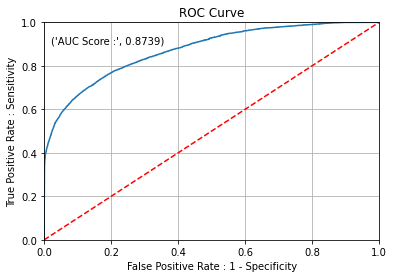

In [171]:
y_pred_prob = lr_model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate : 1 - Specificity')
plt.ylabel('True Positive Rate : Sensitivity')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score :', round(roc_auc_score(y_test, y_pred_prob), 4)))

plt.grid(True)

In [161]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.ensemble import AdaBoostClassifier

In [168]:
m1 = LogisticRegression(random_state=1)
m2 = DecisionTreeClassifier(random_state=1)
m3 = RandomForestClassifier(random_state=1)
m4 = KNeighborsClassifier()
m5 = GaussianNB()
m6 = XGBClassifier(random_state=1)
m7 = AdaBoostClassifier(random_state=1)

In [162]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [170]:
model_name = ['LR','DT','RF','KNN','GNB','XGB','ADA']
kf = KFold(n_splits=5,shuffle=True,random_state=1)
score = pd.DataFrame()

for name,model in zip(model_name,[m1,m2,m3,m4,m5,m6,m7]):
    scores = cross_val_score(model,X_train_scaled,y_train,cv=5,scoring='f1')
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    print(name)
    print('Train Score :', model.score(X_train_scaled,y_train))
    print('Test score', model.score(X_test_scaled,y_test))
    print('Precision', precision_score(y_test,y_pred))
    print('Recall', recall_score(y_test,y_pred))
    print('F1 Score', f1_score(y_test,y_pred))
    print("\n")

LR
Train Score : 0.8125876304720362
Test score 0.8140815927075469
Precision 0.8328626185192657
Recall 0.623216846554457
F1 Score 0.7129473729655055


DT
Train Score : 0.9654031900487735
Test score 0.8159270754690602
Precision 0.7566610195595257
Recall 0.7416408785568722
F1 Score 0.7490756622832097


RF
Train Score : 0.9653432717772957
Test score 0.8363392332857982
Precision 0.7999188969991889
Recall 0.7444335421541248
F1 Score 0.7711794831697878


KNN
Train Score : 0.8709480268913202
Test score 0.8218549897939211
Precision 0.7777867528271406
Recall 0.726771831836365
F1 Score 0.7514144133598658


GNB
Train Score : 0.5339796517550062
Test score 0.535917009199452
Precision 0.44221209610604806
Recall 0.9668654238055703
F1 Score 0.6068645332449013


[21:01:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Expli

#### Fitting the base model

In [172]:
model = XGBClassifier(random_state = 1)
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

print('Train score :', model.score(X_train_scaled,y_train))
print('Test score :', model.score(X_test_scaled,y_test))
print('Precision Score :', precision_score(y_test,y_pred))
print('Recall Score :', recall_score(y_test,y_pred))
print('F1 Score :', f1_score(y_test,y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

[21:09:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score : 0.8471125384974895
Test score : 0.8377652881469675
Precision Score : 0.8383462062698773
Recall Score : 0.6963544418446675
F1 Score : 0.7607817267254886
Confusion Matrix
[[20735  1779]
 [ 4023  9226]]


#### SMOTE

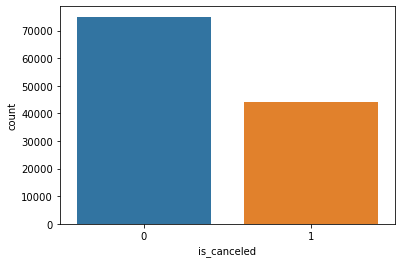

In [166]:
sns.countplot(df_copy_no_yfe['is_canceled'])
plt.show()

In [167]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 1)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

In [168]:
X_train_scaled.shape, y_train.shape

((83447, 58), (83447,))

In [176]:
X_res.shape, y_res.shape

((104994, 58), (104994,))

#### Refitting base model

In [177]:
model = XGBClassifier(random_state = 1)
model.fit(X_res,y_res)
y_pred = model.predict(X_test_scaled)

print('Train score :', model.score(X_res,y_res))
print('Test score :', model.score(X_test_scaled,y_test))
print('Precision Score :', precision_score(y_test,y_pred))
print('Recall Score :', recall_score(y_test,y_pred))
print('F1 Score :', f1_score(y_test,y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

[21:13:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score : 0.8506867059070042
Test score : 0.8299918910605933
Precision Score : 0.7767312591677603
Recall Score : 0.7593780662691524
F1 Score : 0.7679566445309518
Confusion Matrix
[[19622  2892]
 [ 3188 10061]]


#### Using GridSearchCV

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
param_grid={'colsample_bytree': [0.7, 0.8]}

model = XGBClassifier(random_state=1)
cv_rfc = GridSearchCV(model,param_grid,cv=5)
cv_rfc.fit(X_train_scaled,y_train)
y_pred = cv_rfc.predict(X_test_scaled)

cv_rfc.best_params_

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
param_grid={'max_depth': [15,20,25]}

model = XGBClassifier(random_state=1)
cv_rfc = GridSearchCV(model,param_grid,cv=5)
cv_rfc.fit(X_train_scaled,y_train)
y_pred = cv_rfc.predict(X_test_scaled)

cv_rfc.best_params_

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
param_grid={'subsample': [0.7, 0.8, 0.9]}

model = XGBClassifier(random_state=1)
cv_rfc = GridSearchCV(model,param_grid,cv=5)
cv_rfc.fit(X_train_scaled,y_train)
y_pred = cv_rfc.predict(X_test_scaled)

cv_rfc.best_params_

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
param_grid={'reg_lambda': [1.1, 1.2, 1.3]}

model = XGBClassifier(random_state=1)
cv_rfc = GridSearchCV(model,param_grid,cv=5)
cv_rfc.fit(X_train_scaled,y_train)
y_pred = cv_rfc.predict(X_test_scaled)

cv_rfc.best_params_

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
param_grid = {'reg_alpha': [1.1, 1.2, 1.3]}

model = XGBClassifier(random_state=1)
cv_rfc = GridSearchCV(model,param_grid,cv=5)
cv_rfc.fit(X_train_scaled,y_train)
y_pred = cv_rfc.predict(X_test_scaled)

cv_rfc.best_params_

#### Using the tuned hyperparameters

In [181]:
model = XGBClassifier(random_state = 1, colsample_bytree = 0.8, max_depth = 15, subsample = 0.9, 
                      reg_lambda = 1.2, reg_alpha = 1.1)
model.fit(X_res,y_res)
y_pred = model.predict(X_test_scaled)

print('Train score :', model.score(X_res, y_res))
print('Test score :', model.score(X_test_scaled, y_test))
print('Precision Score :', precision_score(y_test, y_pred))
print('Recall Score :', recall_score(y_test, y_pred))
print('F1 Score :', f1_score(y_test, y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

[22:10:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score : 0.924367106691811
Test score : 0.839163381148114
Precision Score : 0.7822028156289995
Recall Score : 0.7842101290663446
F1 Score : 0.7832051861902608
Confusion Matrix
[[19621  2893]
 [ 2859 10390]]


#### Selecting the significant features

In [163]:
from sklearn.feature_selection import RFE

In [169]:
model = XGBClassifier(random_state = 1)
rfe_model = RFE(estimator = model)

rfe_model = rfe_model.fit(X_res, y_res)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

signi_feat_rfe = feat_index[(feat_index==1) | (feat_index == 2)].index

print(signi_feat_rfe)

[10:34:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:35:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:35:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:35:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:38:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:38:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:38:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Index(['hotel_City Hotel', 'country_Africa', 'country_Europe',
       

In [170]:
len(signi_feat_rfe)

30

In [175]:
rfe_model.ranking_

array([ 1, 30,  1,  1,  1,  9,  1,  3,  1,  1, 18, 14, 13, 11, 10, 17, 23,
       19,  6,  1,  1,  1, 15,  1,  1,  8,  1, 26, 16, 24, 20,  1,  1, 21,
        5,  1,  1, 27,  1, 28, 29,  1, 22,  1, 25,  2,  1,  1,  4, 12,  1,
        1,  1,  1,  1,  1,  1,  7])

In [179]:
rfe_model.feature_importances_

AttributeError: 'RFE' object has no attribute 'feature_importances_'

In [203]:
model = XGBClassifier(random_state = 1, colsample_bytree = 0.8, max_depth = 15, subsample = 0.9, 
                      reg_lambda = 1.2, reg_alpha = 1.1)
rfe_model = RFE(estimator = model)

rfe_model = rfe_model.fit(X_res, y_res)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

signi_feat_rfe = feat_index[(feat_index==1) | (feat_index == 2)].index

print(signi_feat_rfe)

[23:16:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:17:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:18:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:34:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:35:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:35:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Index(['hotel_City Hotel', 'country_Africa', 'country_Europe',
       

In [204]:
len(signi_feat_rfe)

30

In [205]:
X_res_df = pd.DataFrame(X_res, columns = X_train.columns)

In [206]:
X_test_df = pd.DataFrame(X_test_scaled, columns = X_train.columns)
X_test_df.head()

,hotel_City Hotel,hotel_Resort Hotel,country_Africa,country_Europe,country_North America,country_Oceania,meal_BB,meal_FB,meal_HB,meal_Undefined,...,lead_category_High,lead_category_Low,lead_category_Medium,lead_category_No Lead Time,Room,net_cancelled,is_repeated_guest,stays_in_week_nights,people,adr_pp
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.401820,0.131641,0.149731
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.269367,0.131641,0.167748
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.269367,0.131641,0.173292
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.167541,0.000000,0.202525
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.167541,0.000000,0.131403


#### Final model

In [164]:
from sklearn.metrics import classification_report

In [208]:
new_X_train = X_res_df[list(signi_feat_rfe)]

model = XGBClassifier(random_state = 1, colsample_bytree = 0.8, max_depth = 15, subsample = 0.9, 
                      reg_lambda = 1.2, reg_alpha = 1.1)
model.fit(new_X_train, y_res)
y_pred = model.predict(X_test_df[signi_feat_rfe])

print('Train score :', model.score(new_X_train, y_res))
print('Test score :', model.score(X_test_df[signi_feat_rfe], y_test))
print('Precision Score :', precision_score(y_test, y_pred))
print('Recall Score :', recall_score(y_test, y_pred))
print('F1 Score :', f1_score(y_test, y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('Classification Report')
print(classification_report(y_test, y_pred))

[23:36:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score : 0.8386193496771244
Test score : 0.8194782316919722
Precision Score : 0.763314985657803
Recall Score : 0.743150426447279
F1 Score : 0.7530977512620468
Confusion Matrix
[[19461  3053]
 [ 3403  9846]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86     22514
         1.0       0.76      0.74      0.75     13249

    accuracy                           0.82     35763
   macro avg       0.81      0.80      0.81     35763
weighted avg       0.82      0.82      0.82     35763



In [210]:
model = XGBClassifier(random_state = 1, colsample_bytree = 0.8, max_depth = 15, subsample = 0.9, 
                      reg_lambda = 1.2, reg_alpha = 1.1)
model.fit(X_res,y_res)
y_pred = model.predict(X_test_scaled)

print('Train score :', model.score(X_res, y_res))
print('Test score :', model.score(X_test_scaled, y_test))
print('Precision Score :', precision_score(y_test, y_pred))
print('Recall Score :', recall_score(y_test, y_pred))
print('F1 Score :', f1_score(y_test, y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

[23:45:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score : 0.924367106691811
Test score : 0.839163381148114
Precision Score : 0.7822028156289995
Recall Score : 0.7842101290663446
F1 Score : 0.7832051861902608
Confusion Matrix
[[19621  2893]
 [ 2859 10390]]


In [211]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

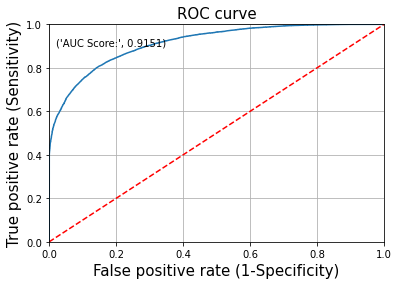

In [212]:
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

plt.grid(True)